In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('spam.csv',encoding="latin1")
print(df.head())
print(df.shape)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
(5572, 5)


In [2]:
print(df.info())
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
df=df.rename(columns={'v1':'target','v2':'text'})
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
print(df.head())


   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

#remove duplicates
df=df.drop_duplicates(keep='first')
print(df.duplicated().sum())
print(df.shape)

target    0
text      0
dtype: int64
403
0
(5169, 2)


target
0    4516
1     653
Name: count, dtype: int64


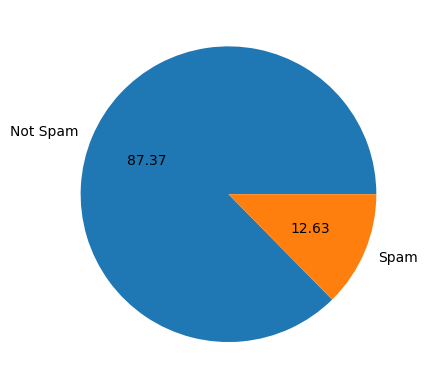

In [6]:
import matplotlib.pyplot as plt
print(df['target'].value_counts())
#0 Not spam
#1 spam

plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [7]:
df['num_chars']=df['text'].apply(len)
print(df.head())

   target                                               text  num_chars
0       0  Go until jurong point, crazy.. Available only ...        111
1       0                      Ok lar... Joking wif u oni...         29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        155
3       0  U dun say so early hor... U c already then say...         49
4       0  Nah I don't think he goes to usf, he lives aro...         61


In [8]:
import nltk 
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt_tab to C:\Users\Vansh
[nltk_data]     Parmar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
print(df.head())

   target                                               text  num_chars  \
0       0  Go until jurong point, crazy.. Available only ...        111   
1       0                      Ok lar... Joking wif u oni...         29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3       0  U dun say so early hor... U c already then say...         49   
4       0  Nah I don't think he goes to usf, he lives aro...         61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15  


In [10]:


df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
print(df.head())

   target                                               text  num_chars  \
0       0  Go until jurong point, crazy.. Available only ...        111   
1       0                      Ok lar... Joking wif u oni...         29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3       0  U dun say so early hor... U c already then say...         49   
4       0  Nah I don't think he goes to usf, he lives aro...         61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1  


In [11]:
print(df[['num_chars','num_words','num_sentences']].describe())

         num_chars    num_words  num_sentences
count  5169.000000  5169.000000    5169.000000
mean     78.977945    18.455794       1.965564
std      58.236293    13.324758       1.448541
min       2.000000     1.000000       1.000000
25%      36.000000     9.000000       1.000000
50%      60.000000    15.000000       1.000000
75%     117.000000    26.000000       2.000000
max     910.000000   220.000000      38.000000


In [12]:
print(df[df['target']==0][['num_chars','num_words','num_sentences']].describe())

         num_chars    num_words  num_sentences
count  4516.000000  4516.000000    4516.000000
mean     70.459256    17.123782       1.820195
std      56.358207    13.493970       1.383657
min       2.000000     1.000000       1.000000
25%      34.000000     8.000000       1.000000
50%      52.000000    13.000000       1.000000
75%      90.000000    22.000000       2.000000
max     910.000000   220.000000      38.000000


In [13]:
print(df[df['target']==1][['num_chars','num_words','num_sentences']].describe())

        num_chars   num_words  num_sentences
count  653.000000  653.000000     653.000000
mean   137.891271   27.667688       2.970904
std     30.137753    7.008418       1.488425
min     13.000000    2.000000       1.000000
25%    132.000000   25.000000       2.000000
50%    149.000000   29.000000       3.000000
75%    157.000000   32.000000       4.000000
max    224.000000   46.000000       9.000000


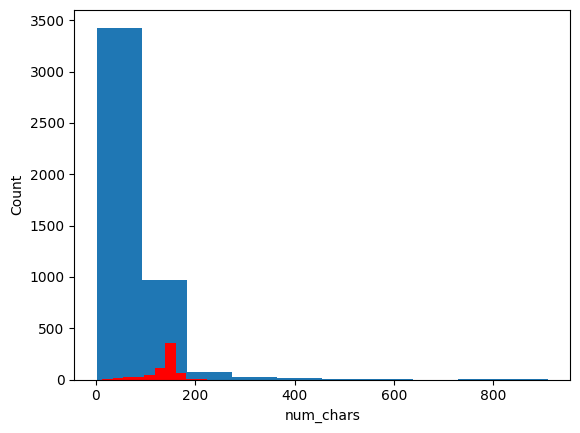

In [14]:
import matplotlib.pyplot as plt
plt.hist(df[df['target']==0]['num_chars'])
plt.hist(df[df['target']==1]['num_chars'],color='red')
plt.xlabel('num_chars')
plt.ylabel('Count')
plt.show()

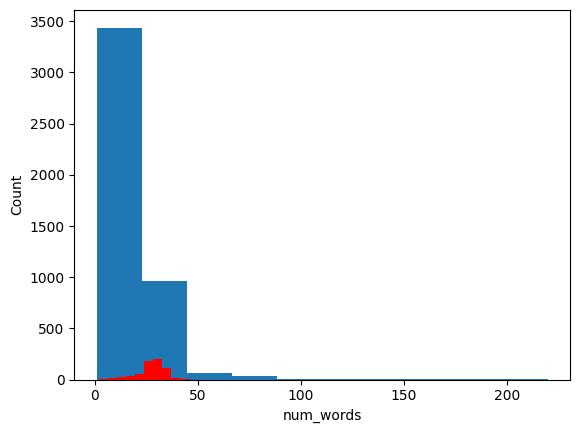

In [15]:
import matplotlib.pyplot as plt
plt.hist(df[df['target']==0]['num_words'])
plt.hist(df[df['target']==1]['num_words'],color='red')
plt.xlabel('num_words')
plt.ylabel('Count')
plt.show()

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vansh
[nltk_data]     Parmar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

ps=PorterStemmer()

def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
       y.append(ps.stem(i))

    return " ".join(y)

transform("I am learning Machine learning right now")

'learn machin learn right'

In [18]:
df['transformed_text']=df['text'].apply(transform)
print(df.head())

   target                                               text  num_chars  \
0       0  Go until jurong point, crazy.. Available only ...        111   
1       0                      Ok lar... Joking wif u oni...         29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3       0  U dun say so early hor... U c already then say...         49   
4       0  Nah I don't think he goes to usf, he lives aro...         61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though  


In [19]:
print(df.head())

   target                                               text  num_chars  \
0       0  Go until jurong point, crazy.. Available only ...        111   
1       0                      Ok lar... Joking wif u oni...         29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3       0  U dun say so early hor... U c already then say...         49   
4       0  Nah I don't think he goes to usf, he lives aro...         61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though  


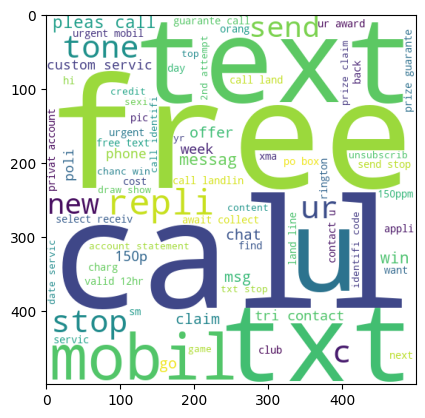

In [20]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

plt.imshow(spam_wc)



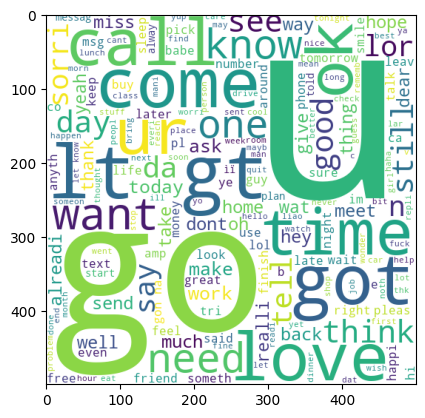

In [21]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

plt.imshow(ham_wc)

In [22]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [23]:
print(len(spam_corpus))

9939


          0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45


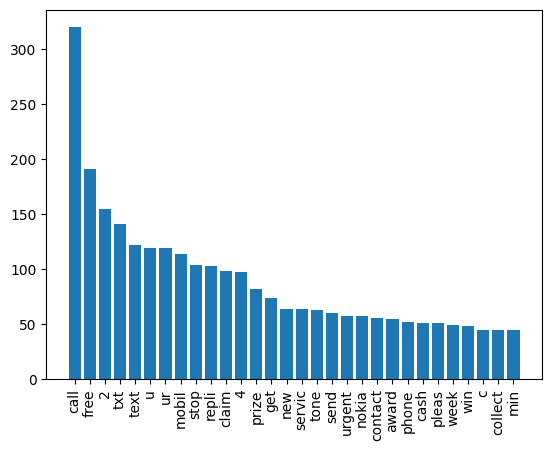

In [24]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))
print(df1)
plt.bar(df1[0],df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

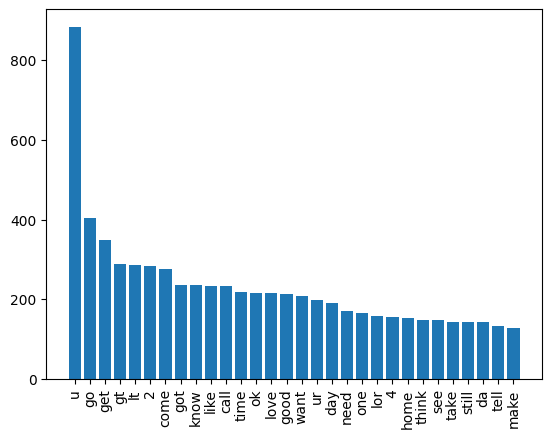

In [26]:
df2=pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.bar(df2[0],df2[1])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
#it selects most frequent 3000 words

X=tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

y=df['target'].values



(5169, 3000)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()



In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [35]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [36]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [42]:
#choosed tfidf and multinomialnaivebayes

trans=transform("please click a link and claim 102 rupess")
input=tfidf.transform([trans])
res=mnb.predict(input)[0]
message='Not spam'
if res==1:
    message='Spam'

print(message)

Spam


In [43]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))